In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

import numpy as np
from os import environ
import torch
from astropy.io import fits

from hydra import initialize, compose
from hydra.utils import instantiate

from bliss.simulator.simulated_dataset import SimulatedDataset
from bliss.catalog import TileCatalog

import torch
from torch.utils.data import DataLoader

from mpl_toolkits.axes_grid1 import inset_locator

In [5]:
# set up plots and colors
sns.set_theme("paper")
matplotlib.rc('text', usetex=True)
plt.rc("font", family="serif")

COLORS = [
    "#0072BD",  # blue
    "#D95319",  # orange
    "#EDB120",  # yellow
    "#7E2F8E",  # purple
    "#77AC30",  # green
	"#4DBEEE",  # light blue
    "#A2142F",  # dark red
]

In [25]:
environ["BLISS_HOME"] = "~/bliss"
with initialize(config_path="../../bliss/conf", version_base=None):
    cfg = compose("aakash")

In [26]:
simulator = instantiate(cfg.simulator)
decoder = simulator.image_decoder
keys = np.arange(len(decoder.psf_galsim))

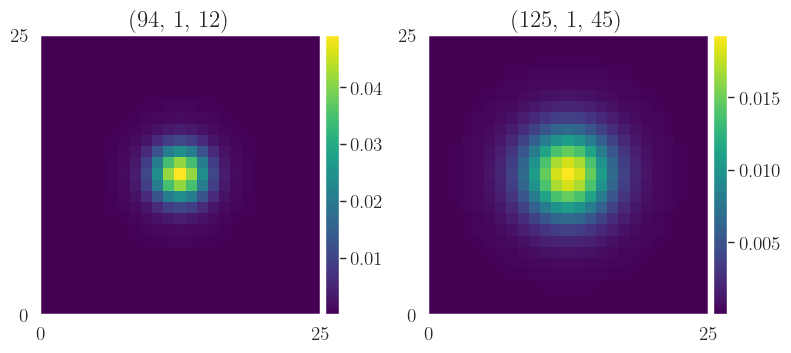

In [53]:
fig, ax = plt.subplots(1, keys.shape[0], figsize=(keys.shape[0] * 4, 4), squeeze=True)
for i in range(keys.shape[0]):
    rcf = list(decoder.psf_galsim.keys())[keys[i]]
    psf = decoder.psf_galsim[rcf]
    im = ax[i].imshow(psf[0].original.image.array, cmap="viridis", extent=(0, 25, 0, 25))
    cax = make_axes_locatable(ax[i]).append_axes("right", size="5%", pad=0.05)
    ax[i].set_title(rcf, fontsize="xx-large")
    ax[i].tick_params(axis="both", which="major", labelsize="x-large")
    plt.colorbar(im, cax=cax)
    cax.tick_params(labelsize="x-large")

    ax[i].set_xticks([0, 25])
    ax[i].set_xticklabels([0, 25])
    ax[i].set_yticks([0, 25])
    ax[i].set_yticklabels([0, 25])
            
fig.tight_layout()
fig.savefig("plots/psfs.pdf")

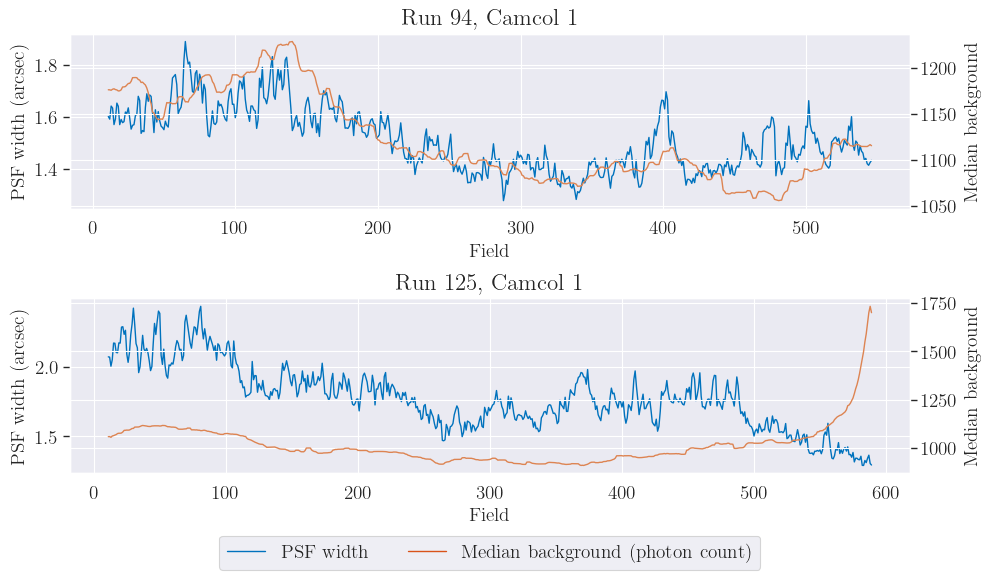

In [59]:
import pandas as pd
data = pd.read_csv("/home/aakashdp/bliss_old/data/sdss_field_data.csv")

cmap = sns.color_palette("deep")

fig, ax = plt.subplots(2, 1, figsize=(10, 6))

for i, (run, camcol) in enumerate([(94, 1), (125, 1)]):
    ax[i].set_title(f"Run {run}, Camcol {camcol}", fontsize="xx-large")
    data_rc = data[(data["run"] == run) & (data["camcol"] == camcol)]
    ax[i].plot(data_rc["field"], data_rc["psfWidth_r"], linewidth=1, c=COLORS[0], label="PSF width")
    ax[i].set_ylabel("PSF width (arcsec)", fontsize="x-large")
    ax[i].set_xlabel("Field", fontsize="x-large")

    twin_ax = ax[i].twinx()
    twin_ax.plot(data_rc["field"], data_rc["sky_r_count"], linewidth=1, c=cmap[1])
    twin_ax.set_ylabel("Median background", fontsize="x-large")
    ax[i].plot([], [], linewidth=1, c=COLORS[1], label="Median background (photon count)")  # hack to get it on the same legend

    ax[i].tick_params(labelsize="x-large")
    twin_ax.tick_params(labelsize="x-large")

bb = (0, 1.1, 1, 0)
ax[1].legend(bbox_to_anchor=(0.5, -0.3), loc="upper center", ncol=2, fontsize="x-large")

fig.tight_layout()
plt.savefig("plots/psf_background_variation.pdf")